## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  25.959927   447.643197  0.137852  5.299779  1.243419
1  46.760958   900.996132  0.570370  4.840154  1.518776
2  61.359627   867.919823  0.871551  5.131818  1.556593
3  52.369024  1222.771467  0.266933  6.550075  1.451618
4  63.539646   737.754357  0.307086  9.028254  1.360829


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0269275	total: 55.3ms	remaining: 55.2s
1:	learn: 1.0144794	total: 55.8ms	remaining: 27.9s
2:	learn: 1.0035198	total: 56.3ms	remaining: 18.7s


3:	learn: 0.9928229	total: 57.9ms	remaining: 14.4s
4:	learn: 0.9832743	total: 58.8ms	remaining: 11.7s
5:	learn: 0.9709132	total: 59.4ms	remaining: 9.84s
6:	learn: 0.9604593	total: 60ms	remaining: 8.52s
7:	learn: 0.9462564	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9351959	total: 61.1ms	remaining: 6.73s
9:	learn: 0.9223281	total: 61.6ms	remaining: 6.1s
10:	learn: 0.9108530	total: 62.1ms	remaining: 5.58s
11:	learn: 0.8988572	total: 62.6ms	remaining: 5.16s
12:	learn: 0.8904440	total: 63.2ms	remaining: 4.8s
13:	learn: 0.8802286	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8696502	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8603472	total: 64.8ms	remaining: 3.99s
16:	learn: 0.8485096	total: 65.3ms	remaining: 3.77s
17:	learn: 0.8378141	total: 65.6ms	remaining: 3.58s
18:	learn: 0.8271765	total: 66.2ms	remaining: 3.42s
19:	learn: 0.8169705	total: 66.7ms	remaining: 3.27s
20:	learn: 0.8072327	total: 67.2ms	remaining: 3.13s
21:	learn: 0.7970020	total: 67.8ms	remaining: 3.01s
22:	learn: 0.7887291	to

233:	learn: 0.1680154	total: 164ms	remaining: 537ms
234:	learn: 0.1676490	total: 165ms	remaining: 536ms
235:	learn: 0.1665404	total: 165ms	remaining: 535ms
236:	learn: 0.1659656	total: 166ms	remaining: 533ms
237:	learn: 0.1653511	total: 166ms	remaining: 532ms
238:	learn: 0.1650114	total: 167ms	remaining: 531ms
239:	learn: 0.1647126	total: 167ms	remaining: 529ms
240:	learn: 0.1639763	total: 167ms	remaining: 527ms
241:	learn: 0.1635103	total: 168ms	remaining: 526ms
242:	learn: 0.1629259	total: 168ms	remaining: 525ms
243:	learn: 0.1626013	total: 169ms	remaining: 523ms
244:	learn: 0.1616993	total: 169ms	remaining: 521ms
245:	learn: 0.1613942	total: 170ms	remaining: 520ms
246:	learn: 0.1609668	total: 170ms	remaining: 518ms
247:	learn: 0.1599878	total: 170ms	remaining: 517ms
248:	learn: 0.1596770	total: 171ms	remaining: 515ms
249:	learn: 0.1592491	total: 171ms	remaining: 514ms
250:	learn: 0.1588889	total: 172ms	remaining: 512ms
251:	learn: 0.1582708	total: 172ms	remaining: 511ms
252:	learn: 

336:	learn: 0.1193606	total: 209ms	remaining: 411ms
337:	learn: 0.1190565	total: 210ms	remaining: 410ms
338:	learn: 0.1183573	total: 210ms	remaining: 410ms
339:	learn: 0.1178558	total: 210ms	remaining: 409ms
340:	learn: 0.1172836	total: 211ms	remaining: 407ms
341:	learn: 0.1169887	total: 211ms	remaining: 406ms
342:	learn: 0.1167000	total: 212ms	remaining: 405ms
343:	learn: 0.1161048	total: 212ms	remaining: 404ms
344:	learn: 0.1154836	total: 213ms	remaining: 404ms
345:	learn: 0.1153457	total: 213ms	remaining: 403ms
346:	learn: 0.1147695	total: 213ms	remaining: 401ms
347:	learn: 0.1144915	total: 214ms	remaining: 400ms
348:	learn: 0.1139396	total: 214ms	remaining: 399ms
349:	learn: 0.1134000	total: 214ms	remaining: 398ms
350:	learn: 0.1131768	total: 215ms	remaining: 397ms
351:	learn: 0.1126561	total: 215ms	remaining: 396ms
352:	learn: 0.1123079	total: 215ms	remaining: 395ms
353:	learn: 0.1118995	total: 216ms	remaining: 394ms
354:	learn: 0.1112914	total: 216ms	remaining: 393ms
355:	learn: 

573:	learn: 0.0627383	total: 317ms	remaining: 235ms
574:	learn: 0.0626426	total: 318ms	remaining: 235ms
575:	learn: 0.0625398	total: 318ms	remaining: 234ms
576:	learn: 0.0623696	total: 319ms	remaining: 234ms
577:	learn: 0.0622676	total: 320ms	remaining: 233ms
578:	learn: 0.0620299	total: 320ms	remaining: 233ms
579:	learn: 0.0619035	total: 320ms	remaining: 232ms
580:	learn: 0.0617368	total: 321ms	remaining: 231ms
581:	learn: 0.0616760	total: 321ms	remaining: 231ms
582:	learn: 0.0616423	total: 322ms	remaining: 230ms
583:	learn: 0.0614789	total: 322ms	remaining: 229ms
584:	learn: 0.0612792	total: 323ms	remaining: 229ms
585:	learn: 0.0611804	total: 323ms	remaining: 228ms
586:	learn: 0.0610924	total: 323ms	remaining: 228ms
587:	learn: 0.0609349	total: 324ms	remaining: 227ms
588:	learn: 0.0607051	total: 324ms	remaining: 226ms
589:	learn: 0.0605117	total: 325ms	remaining: 226ms
590:	learn: 0.0604159	total: 325ms	remaining: 225ms
591:	learn: 0.0602957	total: 326ms	remaining: 224ms
592:	learn: 

682:	learn: 0.0487080	total: 368ms	remaining: 171ms
683:	learn: 0.0484461	total: 369ms	remaining: 170ms
684:	learn: 0.0482233	total: 369ms	remaining: 170ms
685:	learn: 0.0480781	total: 370ms	remaining: 169ms
686:	learn: 0.0479853	total: 370ms	remaining: 169ms
687:	learn: 0.0477316	total: 371ms	remaining: 168ms
688:	learn: 0.0475164	total: 371ms	remaining: 168ms
689:	learn: 0.0473765	total: 372ms	remaining: 167ms
690:	learn: 0.0472403	total: 372ms	remaining: 166ms
691:	learn: 0.0471513	total: 373ms	remaining: 166ms
692:	learn: 0.0469939	total: 373ms	remaining: 165ms
693:	learn: 0.0467811	total: 374ms	remaining: 165ms
694:	learn: 0.0466723	total: 374ms	remaining: 164ms
695:	learn: 0.0464945	total: 375ms	remaining: 164ms
696:	learn: 0.0463642	total: 375ms	remaining: 163ms
697:	learn: 0.0461596	total: 375ms	remaining: 162ms
698:	learn: 0.0460541	total: 376ms	remaining: 162ms
699:	learn: 0.0458240	total: 376ms	remaining: 161ms
700:	learn: 0.0456544	total: 377ms	remaining: 161ms
701:	learn: 

916:	learn: 0.0266320	total: 477ms	remaining: 43.2ms
917:	learn: 0.0264704	total: 478ms	remaining: 42.7ms
918:	learn: 0.0264553	total: 478ms	remaining: 42.2ms
919:	learn: 0.0264256	total: 479ms	remaining: 41.6ms
920:	learn: 0.0263902	total: 479ms	remaining: 41.1ms
921:	learn: 0.0263450	total: 480ms	remaining: 40.6ms
922:	learn: 0.0262416	total: 480ms	remaining: 40.1ms
923:	learn: 0.0262130	total: 481ms	remaining: 39.5ms
924:	learn: 0.0261236	total: 481ms	remaining: 39ms
925:	learn: 0.0260779	total: 482ms	remaining: 38.5ms
926:	learn: 0.0259772	total: 482ms	remaining: 38ms
927:	learn: 0.0259314	total: 483ms	remaining: 37.4ms
928:	learn: 0.0258612	total: 483ms	remaining: 36.9ms
929:	learn: 0.0257634	total: 483ms	remaining: 36.4ms
930:	learn: 0.0257418	total: 484ms	remaining: 35.8ms
931:	learn: 0.0256553	total: 484ms	remaining: 35.3ms
932:	learn: 0.0255849	total: 485ms	remaining: 34.8ms
933:	learn: 0.0255638	total: 485ms	remaining: 34.3ms
934:	learn: 0.0255202	total: 486ms	remaining: 33.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2305560789976603


ABC Pre-generator MAE 0.20934266762692047


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

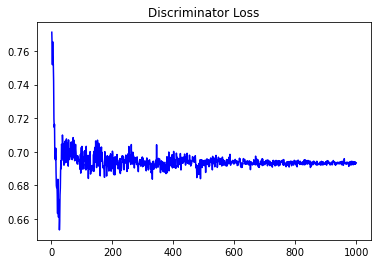

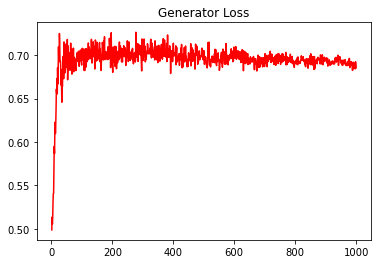

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5866304694283754


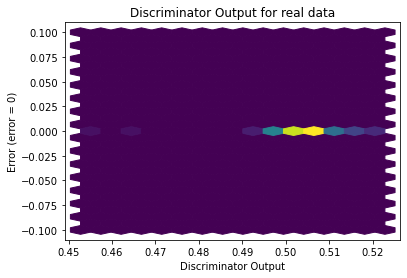

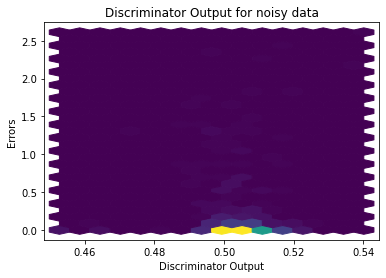

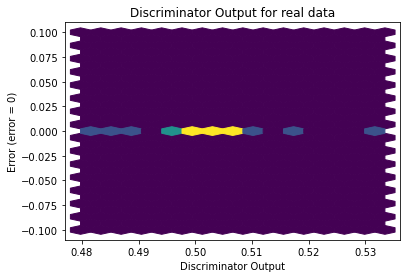

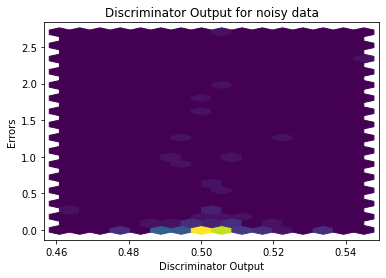

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

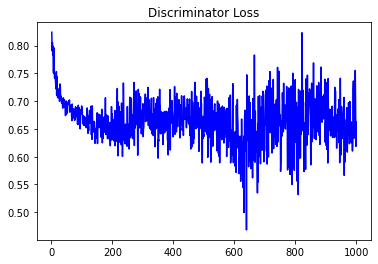

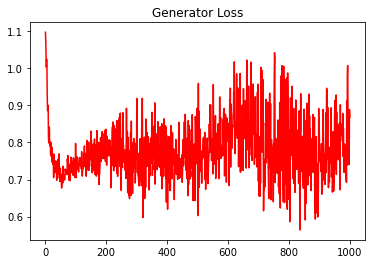

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.8242716412823647


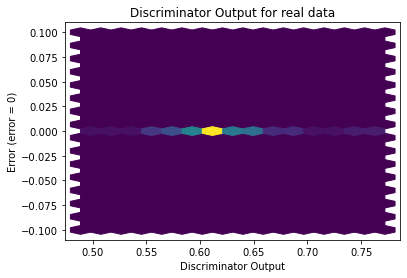

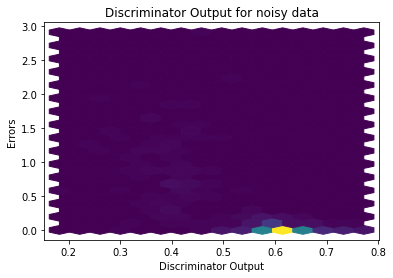

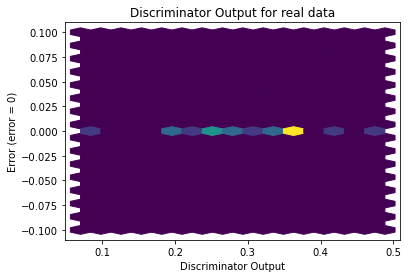

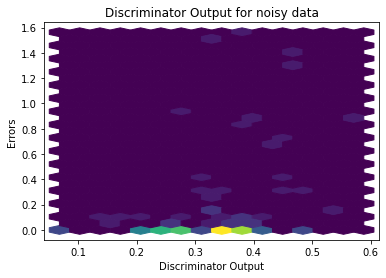

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


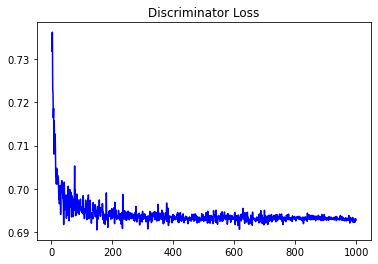

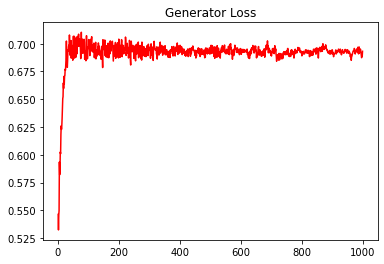

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.5122072646487504


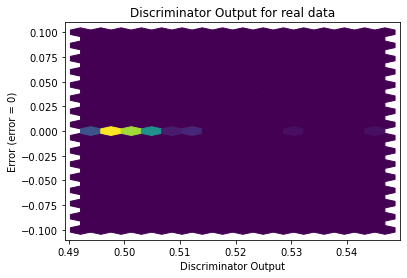

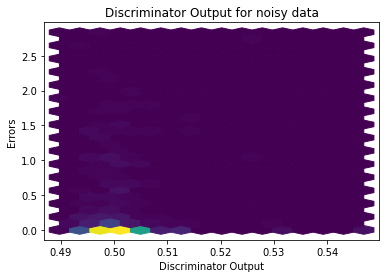

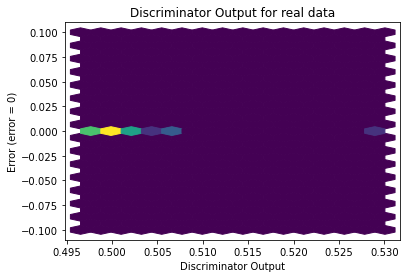

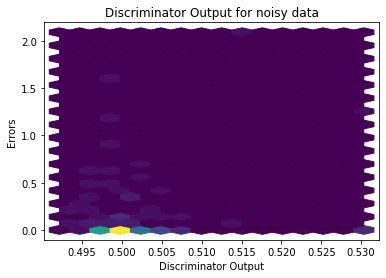

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


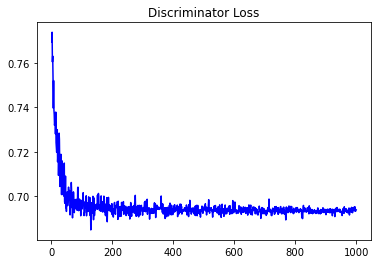

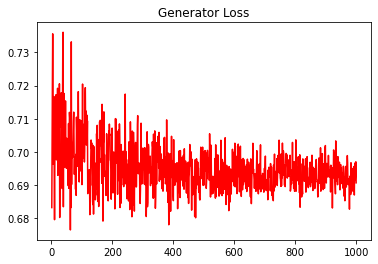

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2610580099087529


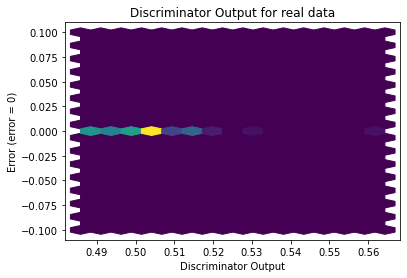

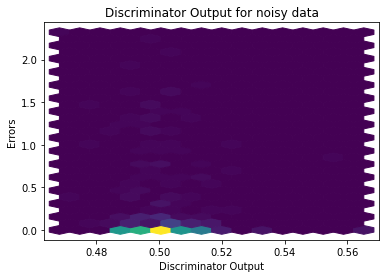

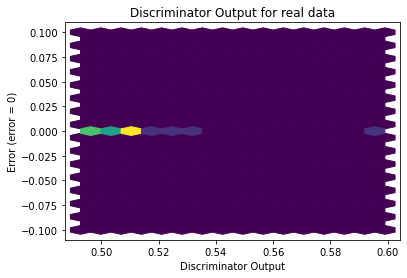

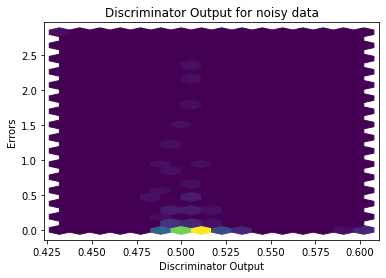

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7328]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0438]], requires_grad=True)
